# k-Nearst Neighbor

In [3]:
# Set up Notebook

%matplotlib inline

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib import cm
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# We do this to ignore several specific warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

In [4]:
iris = sns.load_dataset("iris")
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
97,6.2,2.9,4.3,1.3,versicolor
66,5.6,3.0,4.5,1.5,versicolor
96,5.7,2.9,4.2,1.3,versicolor
103,6.3,2.9,5.6,1.8,virginica
39,5.1,3.4,1.5,0.2,setosa


In [6]:
data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
labels = np.array([i//50 for i in range(iris.shape[0])])
frac = 0.4

In [7]:
# We want to split our data into training and testing
# Note that we have both 'data' and 'labels'
d_train, d_test, l_train, l_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=frac, 
                                                    random_state=23)
    
# Now scale our data
# Create and fit scaler
sc = StandardScaler().fit(d_train)


In [8]:
d_train_sc = sc.transform(d_train)
d_test_sc = sc.transform(d_test)

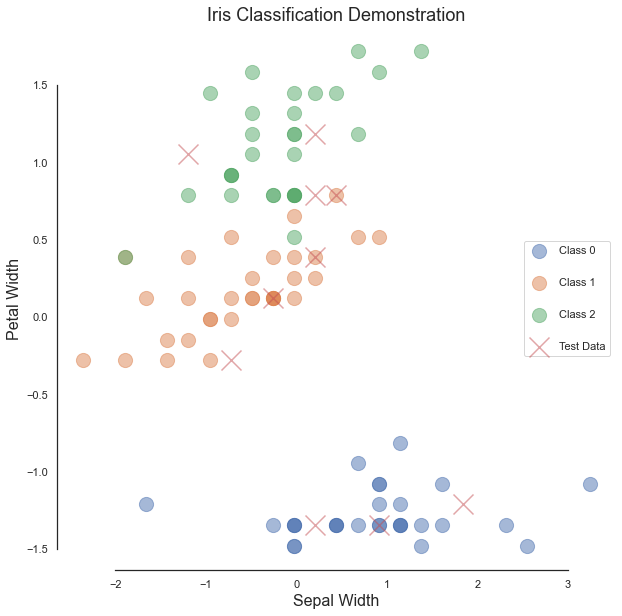

In [11]:
# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots(figsize=(10, 10))

x = d_train_sc[:, 1]
y = d_train_sc[:, 3]
num_show = 10

for idx in np.unique(l_train):
    i = int(idx)
    ax.scatter(x[l_train == i], y[l_train == i], label=f'Class {i}',
                       s=200, alpha = .5, cmap=cm.coolwarm) 

xx = d_test_sc[:num_show, 1]
yy = d_test_sc[:num_show, 3]
ax.scatter(xx, yy, label='Test Data',
           marker='x', s=400, 
           alpha = .5, cmap=cm.coolwarm) 
        
# Decorate and clean plot
ax.set_xlabel('Sepal Width', fontsize=16)
ax.set_ylabel('Petal Width', fontsize=16)
ax.legend(loc = 7, labelspacing=2)
ax.set_title("Iris Classification Demonstration", fontsize=18)
sns.despine(offset=0, trim=True)